In [2]:
# imports 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.image as mpimg


In [3]:
# functions 

def read_data(file_name):
    with open(file_name, 'rb') as fid:
        data = np.fromfile(fid, dtype='>f8')
    
    points = data.reshape(-1, 3)

    points[:, 0] -= np.median(points[:, 0])
    points[:, 1] -= np.median(points[:, 1])
    points[:, 2] -= np.median(points[:, 2])
    
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    return x, y, z

def interpolate_z(x, y, z):
    grid_x, grid_y = np.meshgrid(
          np.linspace(min(x), max(x), 256),
          np.linspace(min(y), max(y), 256)
     )
    
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

    return grid_x, grid_y, grid_z

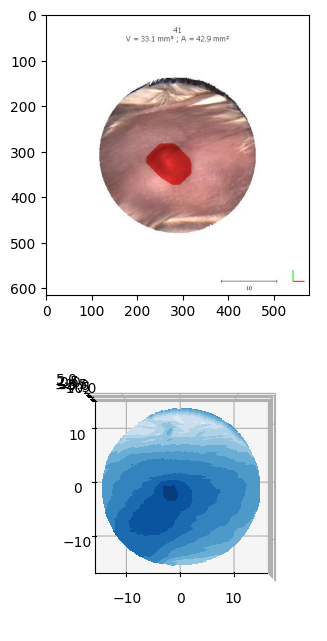

In [4]:
file_path = ''
x, y, z = read_data('./data/invotive_data/L3.3 Parental 2-Control-1-0-41.bin')
X, Y, Z = interpolate_z(x, y, z)

fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(2, 1, 1)
ax.imshow(mpimg.imread('./data/invotive_data/L3.3 Parental 2-Control-1-0-41.jpg'))

ax = fig.add_subplot(2, 1, 2, projection='3d')

ax.contourf(X,Y,Z, cmap='Blues', levels=10) 
ax.view_init(90,270)

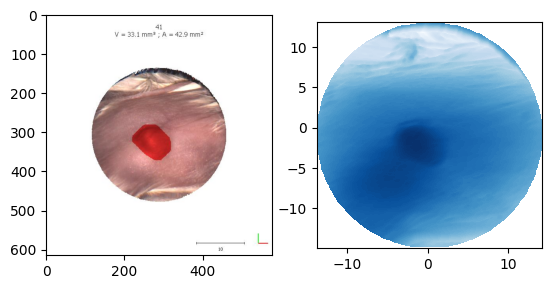

In [5]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(mpimg.imread('./data/invotive_data/L3.3 Parental 2-Control-1-0-41.jpg'))
img = ax[1].contourf(X,Y,Z, levels=100, cmap="Blues")
ax[1].set_aspect('equal')


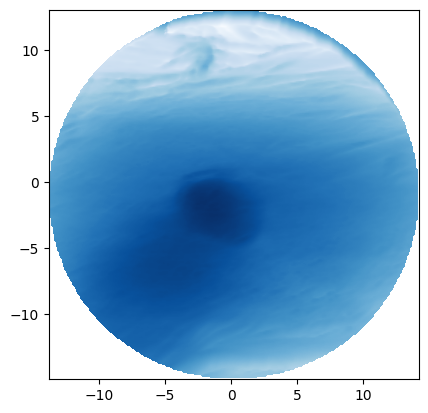

In [27]:
# Initialize a blank image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2

height, width = Z.shape

plt.contourf(X, Y, Z, levels=1000, cmap="Blues", origin="upper")
plt.gca().set_aspect('equal')
plt.savefig('foo.png')